In [1]:
#install once
#!pip install pandas numpy matplotlib seaborn scikit-learn
#install once

In [2]:
#install once
#!pip install seaborn

In [3]:
#install once
#!pip install statsmodels

# 1. Importing Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
import os

In [6]:
full_path = r'C:\Users\evett\Documents\D502 CAPSTONE Coding\CAPSTONE Dataset.csv'
df = pd.read_csv(full_path)

# 2. Pre-processing

In [7]:
#Peek at 1st 5 rows of data
df.head()

,Humidity,Temperature,Step_Count,Stress_Level
0,21.33,90.33,123.0,1.0
1,21.41,90.41,93.0,1.0
2,27.12,96.12,196.0,2.0
3,27.64,96.64,177.0,2.0
4,10.87,79.87,87.0,0.0


### Column Descriptions


**Humidity** 

As stress occurs, body temperature rises, and sweat glands become active. The exuded sweat is the measurement of the humidity level.

**Temperature** 

Body Temperature of a person during stress.

**Stepcount**

Count of steps performed by the person during a stressful situation.

**Stress_Level**

Based on all the above 3 Factors our Stress Level will be predicted as High, Medium and Low accordingly.


In [8]:
#summary of data set (count of entries, average, standard deviation, and max value)
df.describe()

,Humidity,Temperature,Step_Count,Stress_Level
count,2006.000000,2006.000000,2006.000000,2007.000000
mean,19.983799,88.945299,100.086241,1.105132
std,5.809863,6.570932,58.222439,0.771765
min,0.000000,0.000000,0.000000,0.000000
25%,14.992500,83.992500,49.250000,0.500000
50%,19.995000,88.995000,101.000000,1.000000
75%,24.997500,94.007500,150.000000,2.000000
max,30.000000,151.110000,200.000000,3.000000


In [9]:
df.shape

(2009, 4)

In [10]:
df.info

<bound method DataFrame.info of       Humidity  Temperature  Step_Count  Stress_Level
0        21.33        90.33       123.0           1.0
1        21.41        90.41        93.0           1.0
2        27.12        96.12       196.0           2.0
3        27.64        96.64       177.0           2.0
4        10.87        79.87        87.0           0.0
...        ...          ...         ...           ...
2004     10.45        79.45        45.0           0.0
2005     27.22        96.22       135.0           2.0
2006     12.46        81.46        64.0           0.0
2007     16.87        85.87        50.0           1.0
2008     21.34       151.11       115.0           1.0

[2009 rows x 4 columns]>

In [11]:
dtype_dict = dict(df.dtypes)
print(dtype_dict)

{'Humidity': dtype('float64'), 'Temperature': dtype('float64'), 'Step_Count': dtype('float64'), 'Stress_Level': dtype('float64')}


# 3. Data Cleaning

In [12]:
#Find missing values

In [13]:
print(df.isnull().sum())

Humidity        3
Temperature     3
Step_Count      3
Stress_Level    2
dtype: int64


In [14]:
#As missing values are few, I decided to drop them
df_cleaned = df.dropna()

In [15]:
print(df_cleaned.isnull().sum())

Humidity        0
Temperature     0
Step_Count      0
Stress_Level    0
dtype: int64


In [16]:
#Find duplicate values

In [17]:
#sum(df_cleaned.duplicated())
print("Number of duplicates: ", sum(df_cleaned.duplicated()))

Number of duplicates:  2


In [18]:
df_cleaned.shape

(2006, 4)

In [19]:
#as there are only a couple of duplicates, I decided to drop them
df_cleaned = df_cleaned.drop_duplicates()

In [20]:
df_cleaned.shape

(2004, 4)

In [21]:
#Create scatterplot style to identify outliers
plt.style.use('seaborn-v0_8-darkgrid')

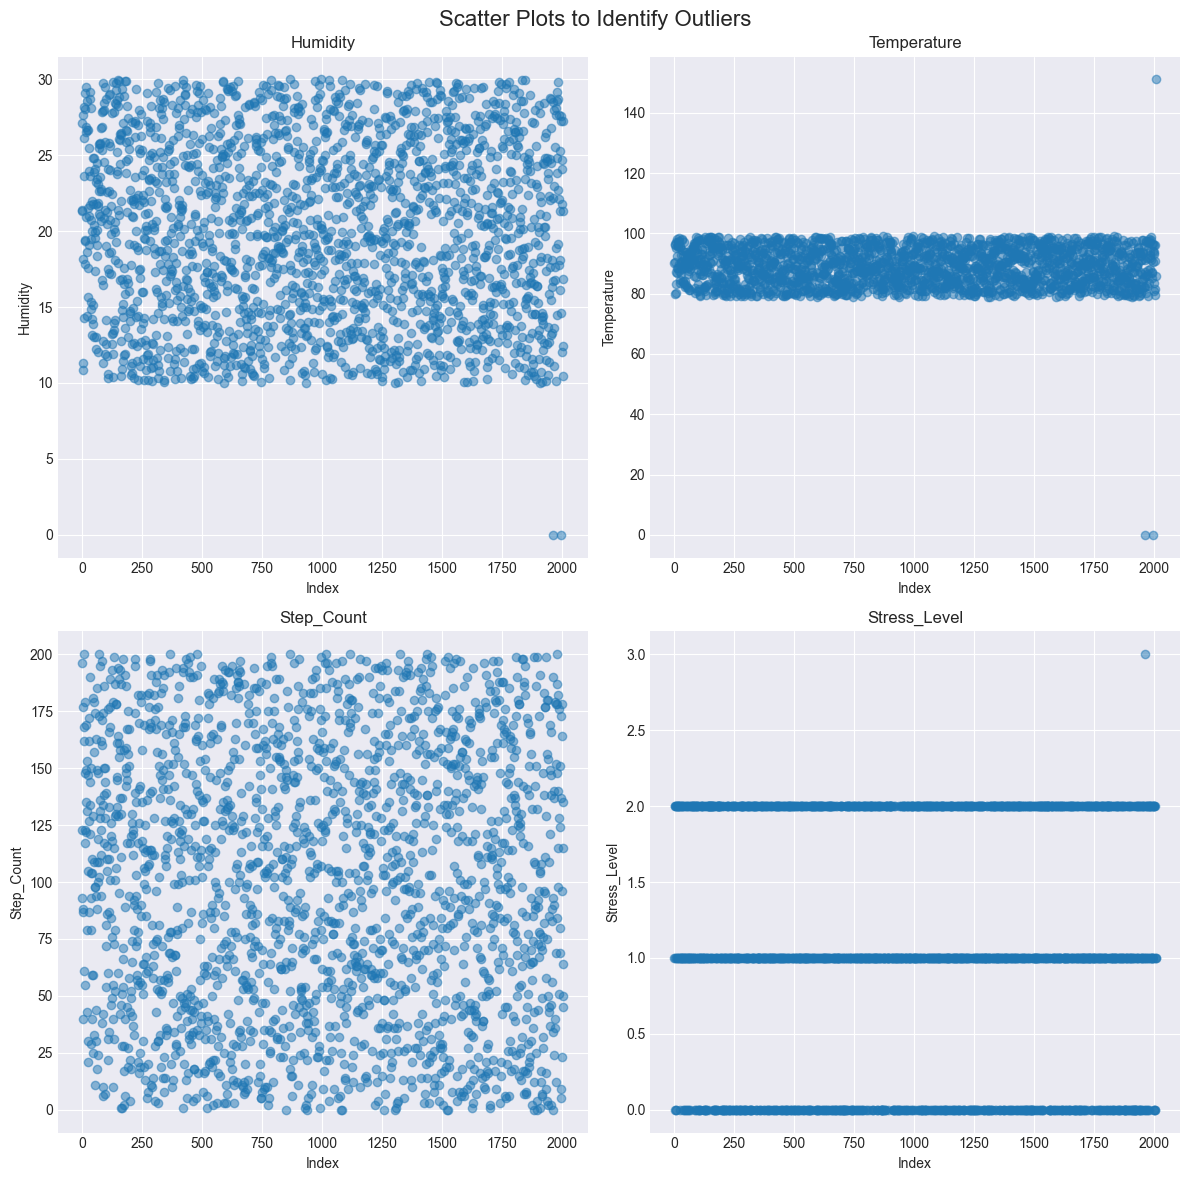

In [22]:
#Create scatterplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Scatter Plots to Identify Outliers', fontsize=16)

axs = axs.flatten()

columns = ["Humidity", "Temperature", "Step_Count", "Stress_Level"]

for i, column in enumerate(columns):
    axs[i].scatter(df_cleaned.index, df_cleaned[column], alpha=0.5)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(column)

plt.tight_layout()

In [23]:
#Remove outliers by setting bounds first
Q1 = df_cleaned['Temperature'].quantile(0.25)
Q3 = df_cleaned['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[(df_cleaned['Temperature'] < lower_bound) | (df_cleaned['Temperature'] > upper_bound)]
new_df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers.index)]


In [24]:
#Confirm outliers removed
print(f"Original dataset size: {len(df_cleaned)}")
print(f"Dataset size after removing outliers: {len(new_df_cleaned)}")
print(f"Number of outliers removed: {len(df_cleaned) - len(new_df_cleaned)}")

Original dataset size: 2004
Dataset size after removing outliers: 2001
Number of outliers removed: 3


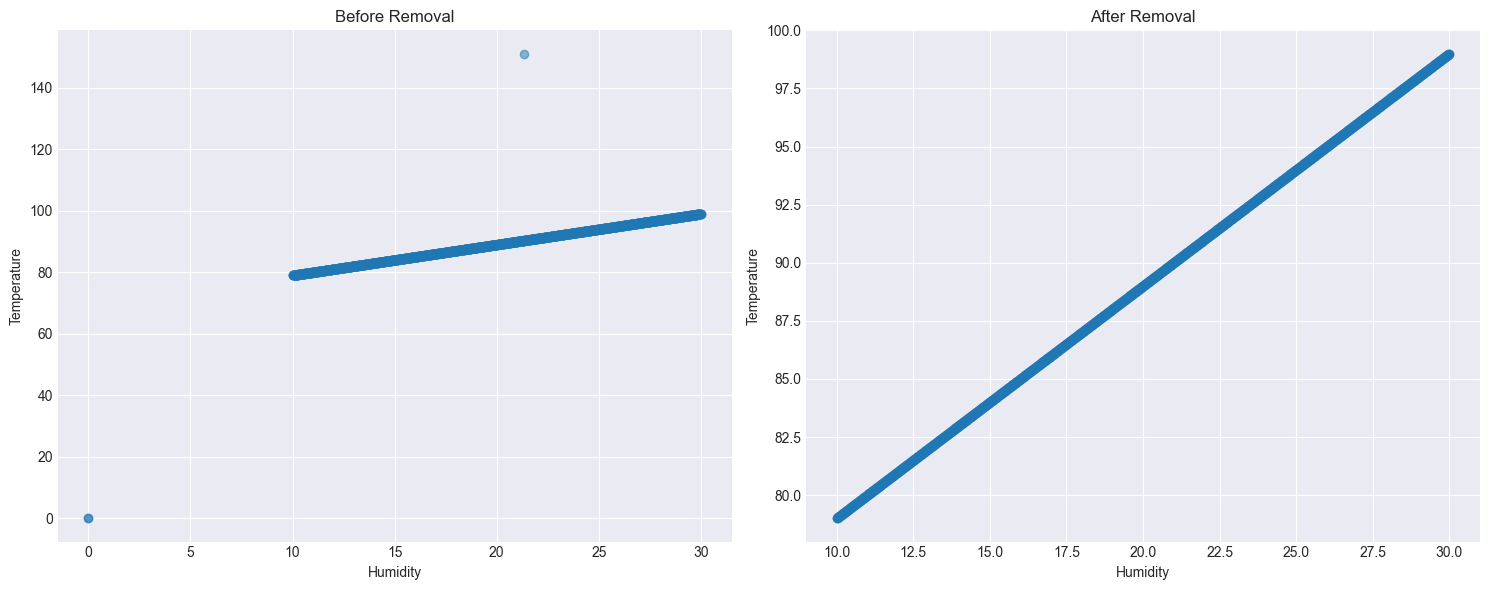

In [25]:
#Compare datasets before and after removal of outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before outlier removal
ax1.scatter(df_cleaned['Humidity'], df_cleaned['Temperature'], alpha=0.5)
ax1.set_title('Before Removal')
ax1.set_xlabel('Humidity')
ax1.set_ylabel('Temperature')

# After outlier removal
ax2.scatter(new_df_cleaned['Humidity'], new_df_cleaned['Temperature'], alpha=0.5)
ax2.set_title('After Removal')
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Temperature')

plt.tight_layout()
plt.show()

# 4. Exploring Data 

In [26]:
#find mean, standard deviation, min, and max values for different stress levels.
stats = df_cleaned.groupby('Stress_Level')['Step_Count'].agg(['mean', 'std', 'min', 'max'])
print(stats)

                    mean        std    min    max
Stress_Level                                     
0.0            42.934132  26.199497    0.0   90.0
1.0            78.084596  37.741977    0.0  129.0
2.0           165.000000  20.508349  130.0  200.0
3.0             0.000000        NaN    0.0    0.0


In [27]:
#Explore the correlation of step counts & stress levels
correlation = new_df_cleaned['Step_Count'].corr(new_df_cleaned['Stress_Level'])
print(f"Correlation between Step Count and Stress Level: {correlation}")

Correlation between Step Count and Stress Level: 0.832623243361435


In [28]:
#Correlation scatterplot

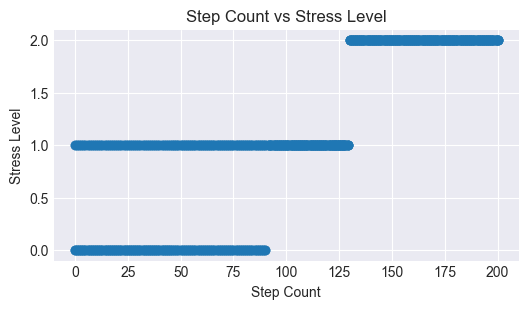

In [29]:
plt.figure(figsize=(6, 3))
plt.scatter(new_df_cleaned['Step_Count'], new_df_cleaned['Stress_Level'], alpha=0.5)
plt.title('Step Count vs Stress Level')
plt.xlabel('Step Count')
plt.ylabel('Stress Level')
plt.show()

In [30]:
#Box Plot of correlation

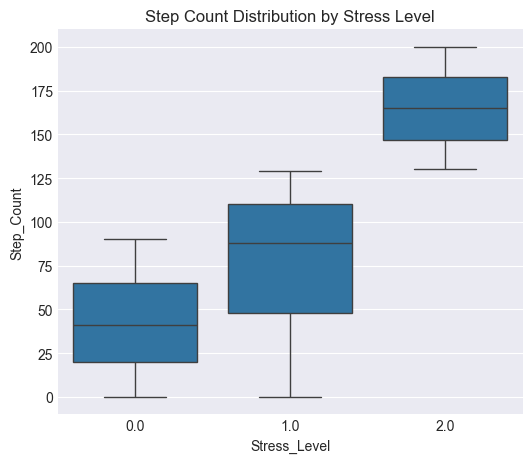

In [31]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Stress_Level', y='Step_Count', data=new_df_cleaned)
plt.title('Step Count Distribution by Stress Level')
plt.show()

# 5. Predicting Model

In [32]:
#Pre-process data for predictive model using 
X = new_df_cleaned[['Step_Count', 'Humidity', 'Temperature']]
y = new_df_cleaned['Stress_Level']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using Random Forest Classifier

In [33]:
#apply Random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00       160
         2.0       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# 6. Interpreting Results

Using Decision Tree Classifier

In [35]:
X = new_df_cleaned[['Step_Count', 'Humidity', 'Temperature']]
y = new_df_cleaned['Stress_Level']

In [36]:
# seperate into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X = new_df_cleaned[['Step_Count', 'Humidity', 'Temperature']]
y = new_df_cleaned['Stress_Level']

# Check if X and y are not empty
if X.empty or y.empty:
    print("Data is empty. Please check your dataset.")

In [38]:
# Ensure there's enough data to split
if len(new_df_cleaned) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Not enough data to split.")

In [39]:
# Initialize and train the model to classify by category
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# print model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00       160
         2.0       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



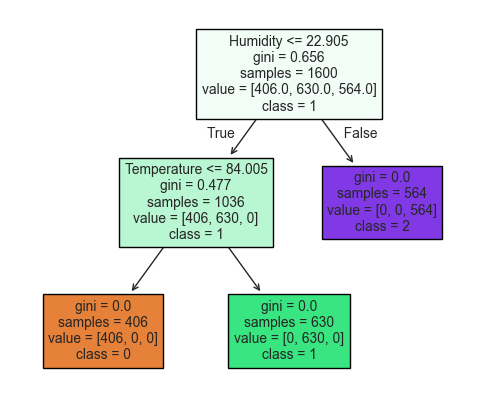

In [40]:
plt.figure(figsize=(6, 5))
plot_tree(clf, feature_names=['Step_Count', 'Humidity', 'Temperature'], class_names=['0', '1', '2'], filled=True)
plt.show()

In [41]:
#list features by importance
feature_importances = clf.feature_importances_
features = X.columns

for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")

Step_Count: 0.00
Humidity: 0.53
Temperature: 0.47


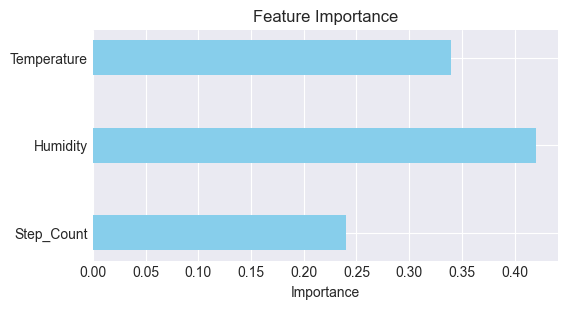

In [42]:
#Feature importance through barchart
features = ['Step_Count', 'Humidity', 'Temperature']
importances = [0.24, 0.42, 0.34]

plt.figure(figsize=(6, 3))
plt.barh(features, importances, color='skyblue', height=0.4)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

The scatter plot shows the distribution of step counts across different stress levels. There are three distinct clusters corresponding to stress levels 0, 1, and 2. Each stress level has a wide range of step counts, but they are visually separated on the y-axis.
The box plot displays the distribution of step counts for each stress level.
    • Stress Level 0: The median step count is lower compared to other stress levels, with a wider interquartile range.
    • Stress Level 1: The median step count is higher than level 0, with a slightly narrower interquartile range.
    • Stress Level 2: This level has the highest median step count and a narrower interquartile range, indicating more
consistent activity levels among individuals with this stress level.

# 7.Conclusion

There is a positive correlation of 0.83 between the amount of high step counts and high stress levels. This could be interpreted to say that individuals with higher stress levels tend to have more physical activity. In other words, higher stressed individuale may be more prone to excercise or take more steps as coping mechanism for stress.
The box plot provides a clearer view of the central tendency and variability in step counts across different stress levels, supporting the observation from the scatter plot. These findings suggest that physical activity might be used as a coping mechanizme for those partipants experiencing stress, which could inform wellness programs aimed at managing stress through exercise.